In [92]:
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")
import statistics
import math

In [93]:
# scenarioname = "Strategic_Reserve"
# selected_scenarios = ["noSR", "strategic_reserve_7", "strategic_reserve_15"]

# selected_scenarios = ["iteration1", "iteration2","iteration3","iteration4", "iteration5","iteration6","iteration7","iteration8","iteration9","iteration10"]
# selected_scenarios =["LowRES_(2010)","medianRES_(2004)","highRES_(1990)"] 
# scenarioname = "capacitymarket"
# selected_scenarios =["NL-capacity market_no_loans","NL-capacity market_with_loans"]
# scenarioname = "SR_expectations"
# selected_scenarios = ["noSR",  "NL-ExpectingSR", "NL-No_expectingSR"]

# scenarioname = "SR_margin"
# selected_scenarios = ["SR2000M5", "SR2000M10","SR2000M15"] 

scenarioname = "SR"
selected_scenarios = ["EOM", "SR1000", "SR1600",  "SR2000M5","SR3000"]

#selected_scenarios = ["noSR", "Strategic_Reserve_5_1500","Strategic_Reserve_10_1500","Strategic_Reserve_15_1500"]

In [94]:
path_to_results = os.path.join(os.getcwd(), "Scenarios", (scenarioname + ".xlsx"))
path_to_plots = os.path.join(os.getcwd(),  "Scenarios", "Comparison_"+ scenarioname )
if not os.path.exists(path_to_plots):
    os.mkdir(path_to_plots)
    
technology_colors = {
    'Biomass_CHP_wood_pellets_DH': "green",
    "Biomass_CHP_wood_pellets_PH": "greenyellow",
    'Coal PSC': "black",
    "Fuel oil PGT": "gray",
    'Lignite PSC': "darkgoldenrod",
    'CCGT': "indianred",
    'OCGT': "gray",
    'Hydropower_reservoir_medium': "darkcyan",
    'PV_utility_systems': "gold",
    'PV': "gold",
    'PV_residential': "khaki",
    'WTG_onshore': "cornflowerblue",
    "WTG_offshore": "navy",
    "Nuclear": "mediumorchid",
    "Hydropower_ROR": "aquamarine",
    "Lithium_ion_battery": "hotpink",
    "Lithium_ion_battery_charge": "hotpink",
    "Pumped_hydro": "darkcyan",
    "CCGT_CHP_backpressure_DH": "orange",
    "fuel_cell": "gold",
    "electrolyzer": "gray",
    "hydrogen_turbine": "darkred",
    "hydrogen_CHP": "indianred",
    "hydrogen_combined_cycle": "coral"
}
others = {
    'Biomass_CHP_wood_pellets_PH': "greenyellow",
    'Coal PSC': "black",
    "Fuel oil PGT": "gray",
    'Lignite PSC': "darkgoldenrod",
    'CCGT': "indianred",
    'OCGT': "darkred",
    "Pumped_hydro": "darkcyan",
    "CCGT_CHP_backpressure_DH": "orange",
    "Nuclear": "mediumorchid",
    "Hydropower_ROR": "aquamarine"
}    

In [95]:
CM_total_costs_data = pd.read_excel(path_to_results, sheet_name='CM_total_costs', index_col=0)
VRES_data = pd.read_excel(path_to_results, sheet_name='VRES', index_col=0)
SR_operator_data = pd.read_excel(path_to_results, sheet_name='SR', index_col=0)
CRM_costs_data = pd.read_excel(path_to_results, sheet_name='CRM', index_col=0)
ElectricityPrices_data = pd.read_excel(path_to_results, sheet_name='ElectricityPrices', index_col=0)

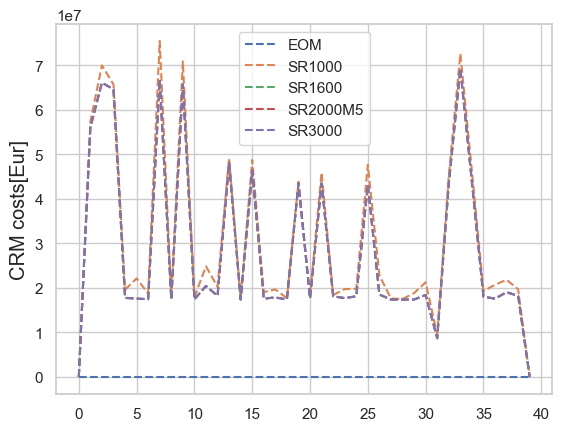

In [96]:
axs1 = CM_total_costs_data.plot(linestyle='dashed')
plt.ylabel('CRM costs[Eur]', fontsize='large')
fig26 = axs1.get_figure()
fig26.savefig(path_to_plots + '/' + 'CRM total costs.png', bbox_inches='tight', dpi=300)

Text(0, 0.5, 'Electricity Prices[Eur/Mwh]')

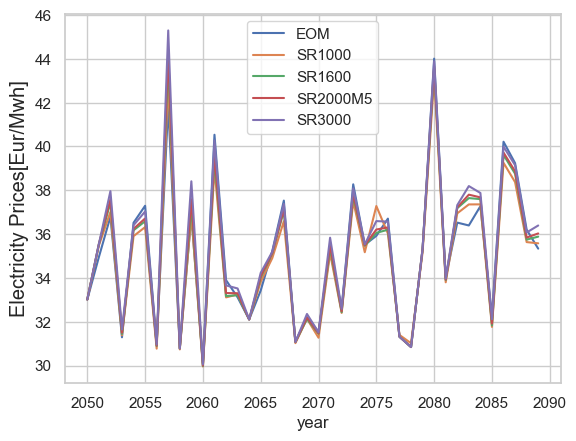

In [97]:
ElectricityPrices_data.plot()
plt.ylabel('Electricity Prices[Eur/Mwh]', fontsize='large')

Text(0, 0.5, 'Costs to society[Eur/Mwh]')

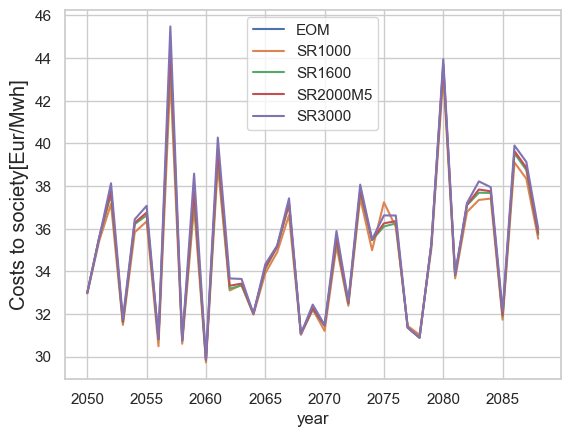

In [98]:
costs_to_society = ElectricityPrices_data - SR_operator_data + CRM_costs_data
costs_to_society.plot()
plt.ylabel('Costs to society[Eur/Mwh]', fontsize='large')

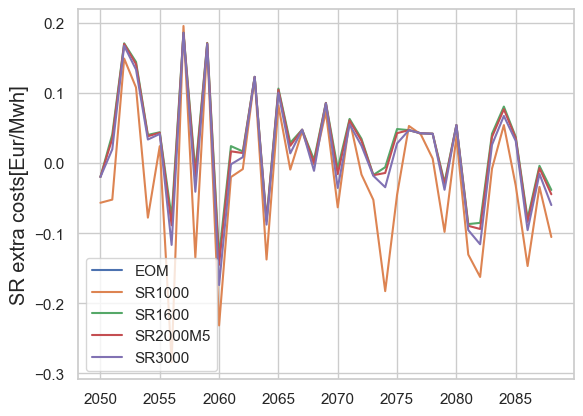

In [99]:
extra_costs =  - SR_operator_data + CRM_costs_data
axs1 = extra_costs.plot()
plt.ylabel('SR extra costs[Eur/Mwh]', fontsize='large')
fig26 = axs1.get_figure()
fig26.savefig(path_to_plots + '/' + 'SRextracosts.png', bbox_inches='tight', dpi=300)

C:\Users\isanchezjimene\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\isanchezjimene\AppData\Local\Temp\ipykernel_7392\1020616749.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


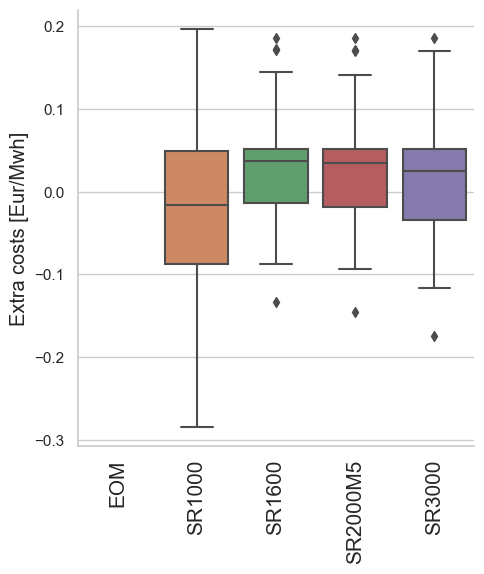

In [100]:
axs1 = sns.catplot( data=pd.melt(extra_costs), x="variable", y="value",  kind="box")
plt.xlabel('', fontsize='large')
plt.ylabel('Extra costs [Eur/Mwh]', fontsize='large')
plt.tight_layout()
plt.xticks(rotation=90, size = 15)
axs1.savefig(path_to_plots + '/' + 'extra_costs.png', bbox_inches='tight', dpi=300)

C:\Users\isanchezjimene\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\isanchezjimene\AppData\Local\Temp\ipykernel_7392\447414726.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


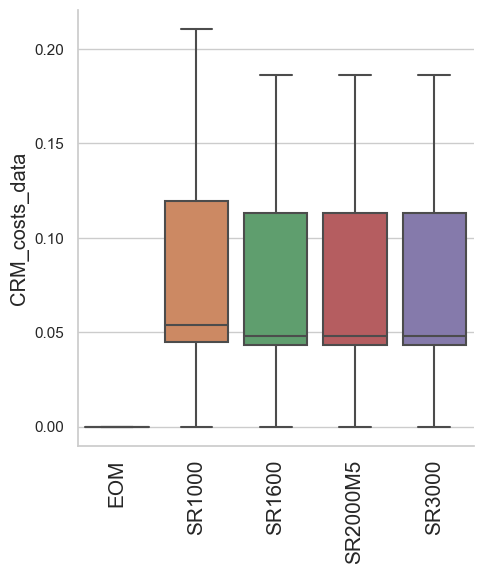

In [101]:
axs1 = sns.catplot( data=pd.melt(CRM_costs_data), x="variable", y="value",  kind="box")
plt.xlabel('', fontsize='large')
plt.ylabel('CRM_costs_data', fontsize='large')
plt.tight_layout()
plt.xticks(rotation=90, size = 15)
axs1.savefig(path_to_plots + '/' + 'CRM_costs_data.png', bbox_inches='tight', dpi=300)

C:\Users\isanchezjimene\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\isanchezjimene\AppData\Local\Temp\ipykernel_7392\2479534470.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


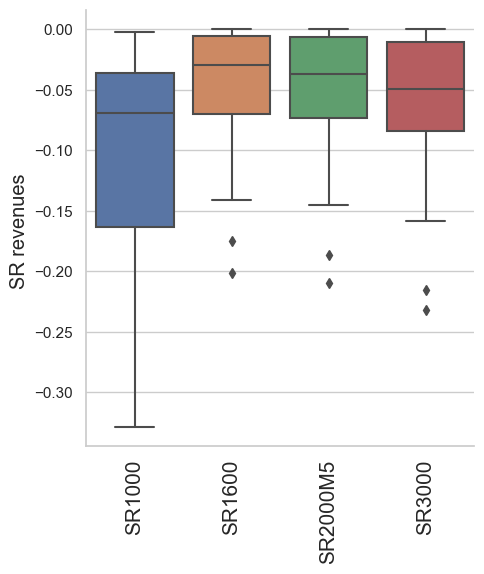

In [102]:
axs1 = sns.catplot( data=pd.melt(-SR_operator_data), x="variable", y="value",  kind="box")
plt.xlabel('', fontsize='large')
plt.ylabel('SR revenues ', fontsize='large')
plt.tight_layout()
plt.xticks(rotation=90, size = 15)
axs1.savefig(path_to_plots + '/' + 'SR_revenues.png', bbox_inches='tight', dpi=300)

In [103]:
merged_df = pd.DataFrame()
melted_elecprices = pd.melt(ElectricityPrices_data)

melted_elecprices['description'] = "without SR costs"
melted_elecprices_withSR = pd.melt(costs_to_society)
melted_elecprices_withSR['description'] = "with SR costs"
merged_df = pd.concat([melted_elecprices, melted_elecprices_withSR], ignore_index=True)


C:\Users\isanchezjimene\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 100x1000 with 0 Axes>

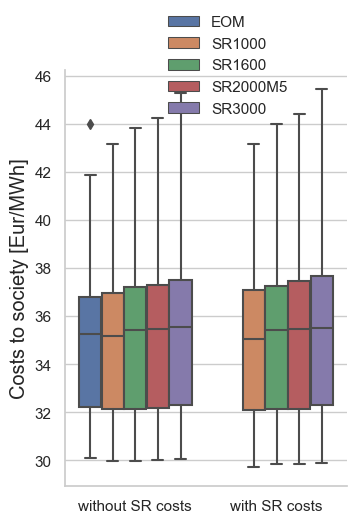

In [104]:
plt.figure(figsize=(1, 10)) 
axs1 = sns.catplot( data=merged_df, x="description", y="value",  kind="box", hue = "variable",  height=5, aspect=0.76)

plt.xlabel('', fontsize='large')
plt.ylabel('Costs to society [Eur/MWh]', fontsize='large')
# plt.tight_layout()
#plt.xticks(rotation=90, size = 15)
sns.move_legend(axs1, "upper center",bbox_to_anchor=(.5, 1.1), title=None)

axs1.savefig(path_to_plots + '/' + 'costs_society_withSR.png', bbox_inches='tight', dpi=300)

In [105]:
extra_costs_df = pd.DataFrame()
melted_CRM_costs = pd.melt(CRM_costs_data)
melted_SR_operator_data= pd.melt(-SR_operator_data)
melted_total_costs= pd.melt(extra_costs)

melted_CRM_costs['description'] = "costs"
melted_SR_operator_data['description'] = "revenues"
melted_total_costs['description'] = "total costs"
merged_extra_costs = pd.concat([melted_CRM_costs, melted_SR_operator_data, melted_total_costs], ignore_index=True)


In [106]:
melted_total_costs.head()

,variable,value,description
0,EOM,NaN,total costs
1,EOM,NaN,total costs
2,EOM,NaN,total costs
3,EOM,NaN,total costs
4,EOM,NaN,total costs


In [107]:
merged_extra_costs.head()

,variable,value,description
0,EOM,0.0,costs
1,EOM,0.0,costs
2,EOM,0.0,costs
3,EOM,0.0,costs
4,EOM,0.0,costs


C:\Users\isanchezjimene\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\isanchezjimene\AppData\Local\Temp\ipykernel_7392\767761859.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


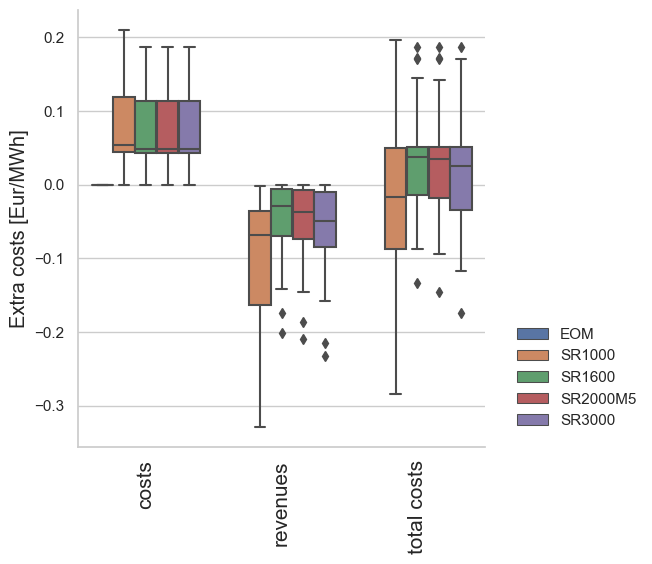

In [108]:

# fig, ax = plt.subplots(figsize=(2, 6))
axs1 =sns.catplot( data=merged_extra_costs, x="description", y="value",  kind="box" ,hue = "variable", 
           height=5, aspect=0.76, legend=True)
plt.xlabel('', fontsize='large')
plt.ylabel('Extra costs [Eur/MWh]', fontsize='large')
plt.tight_layout()
plt.xticks(rotation=90, size = 15)
sns.move_legend( axs1, "lower left", bbox_to_anchor=(1,0.1), title=None)
#sns.move_legend(axs1, "upper center",bbox_to_anchor=(.5, 1.), title=None)
axs1.savefig(path_to_plots + '/' + 'extra_costs.png', bbox_inches='tight', dpi=300)